## Details
1. Topic: Feed forward and backpropagation algorithm
2. Date: 26-01-2025
3. Name: Sai Pranav
4. Roll Number: CS22B1027

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question-1

Implement the Perceptron algorithm from scratch in Python.
Initialize the weights with [0 0 0] and a learning rate of 0.0001.
For each iteration, calculate the output of the Perceptron for each input in the training set.
Use MSE to computer the error for all samples
Update the weights using the gradient descent procedure.
Repeat the above steps until the Perceptron converges or a maximum number of iterations is reached.
Test the trained Perceptron on a separate test set, explain how you came up with the test set.
Use the step function as an  activation function in the output layer

Use the IRIS Dataset for the above, considering all four features: sepal length, sepal width, petal length, and petal width, but only two classes -  Setosa, and Versicolor.  Drop the feature vectors of the other class.

In [2]:
df = pd.read_csv('iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
#Dropping the virginica class entries
df = df.drop(df[df['Species'] == 'Iris-virginica'].index, axis=0)
classes = df['Species'].unique()
classes

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [4]:
# 80-20 split
train_df = pd.DataFrame([], columns = df.columns)
test_df = pd.DataFrame([], columns = df.columns)

for c in classes:
    train_df = pd.concat([train_df, df[df['Species'] == c].head(40)], axis=0)
    test_df = pd.concat([test_df, df[df['Species'] == c].tail(10)], axis=0)

C:\Users\msaip\AppData\Local\Temp\ipykernel_13368\1016050880.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_df = pd.concat([train_df, df[df['Species'] == c].head(40)], axis=0)
C:\Users\msaip\AppData\Local\Temp\ipykernel_13368\1016050880.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_df = pd.concat([test_df, df[df['Species'] == c].tail(10)], axis=0)


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 40 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             20 non-null     object 
 1   SepalLengthCm  20 non-null     float64
 2   SepalWidthCm   20 non-null     float64
 3   PetalLengthCm  20 non-null     float64
 4   PetalWidthCm   20 non-null     float64
 5   Species        20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [20]:
X_train = train_df.drop(['Species', 'Id'], axis=1)
Y_train = train_df['Species']

X_test = test_df.drop(['Species', 'Id'], axis=1)
Y_test = test_df['Species']

In [21]:
#encode setosa as 0 and versicolor as 1
encode = {
    'Iris-setosa': 0, 
    'Iris-versicolor': 1
}

Y_train = Y_train.map(lambda x: encode[x])
Y_test = Y_test.map(lambda x: encode[x])

In [45]:
class Perceptron:
    def __init__(self, x_train, y_train):
        self.w = [0, 0, 0, 0]
        self.b = 1
        self.x_train = x_train.to_numpy()
        self.y_train = y_train.to_numpy()
        self.num_samples = len(x_train)

    #stochastic optimization, aplha is learning rate
    def train_perceptron(self, alpha=0.0001):
        epochs = 1000
        targets = self.y_train
        for _ in range(epochs):
            for i, x in enumerate(self.x_train):
                output = np.dot(self.w, x) + self.b
                mse = 0
                #Step function
                clf = 1 if output >= 0.5 else 0
                    
                if clf != targets[i]:
                    #Gradient Descent Approach
                    mse = (output - targets[i])
                    self.w -= alpha * mse * x
                    self.b -= alpha * mse

    def predict(self, x_test):
        x = x_test.to_numpy()
        output = np.dot(self.w, x) + self.b
        clf = 1 if output >= 0.5 else 0
        return clf
        
    def evaluate(self, x_test, y_test):
        correct_clf = 0
        total_clf = len(x_test)
        y_np = y_test.to_numpy()
        for i, x in enumerate(x_test.to_numpy()):
            output = np.dot(self.w, x) + self.b
            clf = 1 if output >= 0.5 else 0
            if clf == y_np[i]:
                correct_clf += 1

        accuracy = correct_clf * 100 / total_clf
        
        return accuracy
            
                

In [46]:
model = Perceptron(X_train, Y_train)
model.train_perceptron()

print(f'Model accuracy: {model.evaluate(X_test, Y_test)}')

Model accuracy: 95.0


In [47]:
for i in range(len(X_test)):
    print(f'Target Class: {Y_test.iloc[i]}, Predcited Class: {model.predict(X_test.iloc[i])}')

Target Class: 0, Predcited Class: 0
Target Class: 0, Predcited Class: 1
Target Class: 0, Predcited Class: 0
Target Class: 0, Predcited Class: 0
Target Class: 0, Predcited Class: 0
Target Class: 0, Predcited Class: 0
Target Class: 0, Predcited Class: 0
Target Class: 0, Predcited Class: 0
Target Class: 0, Predcited Class: 0
Target Class: 0, Predcited Class: 0
Target Class: 1, Predcited Class: 1
Target Class: 1, Predcited Class: 1
Target Class: 1, Predcited Class: 1
Target Class: 1, Predcited Class: 1
Target Class: 1, Predcited Class: 1
Target Class: 1, Predcited Class: 1
Target Class: 1, Predcited Class: 1
Target Class: 1, Predcited Class: 1
Target Class: 1, Predcited Class: 1
Target Class: 1, Predcited Class: 1


## Question 2
Implement the feedforward and backpropagation learning algorithm for multi layer perceptrons in Python for the question provided in the attached image.
Use  the weights and biases as given.
Implement the forward pass.
Compute the loss between the predicted output and the actual output using an appropriate loss function (MSE).
Compute the gradients of the loss function with respect to the weights and biases using the chain rule.
Update the weights and biases.
Iterate over multiple times (epochs), performing forward propagation, loss calculation, backpropagation, and parameter updates in each iteration till convergence (the actual output is the same as the target output).
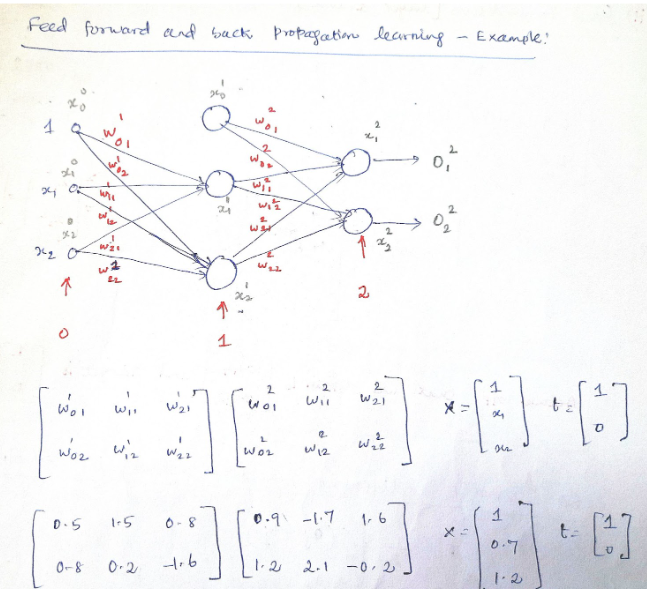

In [179]:
#initialize all the values as given in the question
w1 = np.array([[0.5, 1.5, 0.8], [0.8, 0.2, -1.6]])
w2 = np.array([[0.9, -1.7, 1.6], [1.2, 2.1, -0.2]])
x = np.array([[1], [0.7], [1.2]])
t = np.array([[1], [0]])

In [180]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [181]:
epochs = 1000
alpha = 0.5 #learning ratw

loss = 0

for i in range(epochs):
    #Feed forward
    O1_ = sigmoid(w1 @ x)
    O1 = np.vstack(([1], O1_))
    O2 = sigmoid(w2 @ O1)

    loss += np.mean((O2 - t)**2)
    #Back propagate
        
    #Output layer
    delta2 = O2 * (O2 - t) * (1 - O2)
    
    #Hidden layer
    delta1 = O1_ * (1 - O1_) * (delta2.T @ w2[:, 1:]).T
    
    e2 = delta2 * O1.T
    e1 = delta1 * x.T
    
    w2 -= alpha * e2
    w1 -= alpha * e1

print(O2)

[[0.98077526]
 [0.02073133]]


In [182]:
print(f'Loss: {loss/epochs}')

Loss: 0.01513239976183002
